In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
hacktest = pd.read_csv("hacktest.csv")
hacktrain = pd.read_csv("hacktrain.csv")


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
hacktrain["class_encoded"] = le.fit_transform(hacktrain['class'])
hacktrain.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N',
       'class_encoded'],
      dtype='object')

In [3]:
ndvi_cols = hacktrain.columns[3:-1]
X=hacktrain[ndvi_cols]



In [4]:
def remove_outliers(row):
  Q1 = row.quantile(0.25)
  Q3 = row.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return row.where((row >= lower) & (row <= upper), np.nan)

In [5]:
X=X.apply(remove_outliers, axis=1)
X.sample(10)

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
7100,NaN,3224.860,3046.97,NaN,3169.580,3804.49,3330.7700,4333.23,2231.740,5119.27,...,632.606,3914.760,3105.350,800.368,1819.280,1674.12,1121.470,4090.72,4758.270,1233.840
3150,7834.61,621.598,8013.21,4964.52,3015.790,NaN,6960.6600,2250.28,1348.230,NaN,...,NaN,1214.670,1145.140,980.129,3171.980,1778.31,1998.860,7189.61,1229.440,781.298
3495,7795.48,7537.780,1583.68,5787.38,1158.720,7120.05,6969.2300,7464.15,5756.740,7801.57,...,5995.100,6433.020,1936.510,1791.720,6782.240,NaN,6797.350,7074.47,5911.440,7491.330
6819,5246.22,3055.390,2145.65,3478.82,798.877,5245.51,-29.2957,NaN,574.676,2050.98,...,1493.060,3109.590,231.988,3820.470,333.409,NaN,612.670,6791.92,607.988,2692.800
5505,5070.28,670.257,4423.58,5489.44,1118.040,NaN,682.8250,1482.51,2750.270,4189.24,...,4014.340,3953.230,3036.350,NaN,418.579,1897.36,393.159,5189.73,2042.360,4074.930
6061,8273.70,8115.380,522.14,7859.85,1319.410,7562.15,4047.6000,3159.44,NaN,8152.46,...,5549.560,1681.810,5960.820,955.627,6610.750,NaN,NaN,7464.43,647.765,6589.960
7701,6151.95,NaN,4115.66,6658.26,5770.290,4854.81,4532.7400,NaN,3922.590,NaN,...,5583.240,4978.440,2500.800,5427.060,4187.680,4274.87,4711.250,2861.75,1897.960,3032.030
2567,2348.04,7996.650,7685.04,1247.02,7695.510,7916.95,1075.8900,8008.48,7953.820,7634.84,...,8019.840,521.828,2996.730,NaN,7250.380,2225.31,3968.670,7831.80,6907.610,1308.580
1869,6604.56,NaN,1520.31,7755.13,4483.980,7614.75,1630.7400,2904.35,5277.870,6988.54,...,7803.290,478.039,NaN,NaN,1627.360,1165.65,6652.380,6751.50,5779.690,1582.070
2334,4891.35,NaN,5731.68,4522.04,5545.190,6327.14,NaN,6655.60,5766.810,7449.19,...,NaN,6026.020,NaN,NaN,2235.110,6702.32,664.213,7540.83,3738.330,680.626


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X.sample(10)

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
4743,6858.29,3889.790,672.258,5726.51,453.710,1067.980,586.036,821.118,5858.830,6482.130,...,7632.880,2799.120,500.688,3211.350,331.254,3631.100,347.2770,7065.570,1520.920,619.796
2750,7319.05,7696.820,7675.450,5726.51,5069.970,1710.290,7058.670,7682.010,4389.230,7772.400,...,5358.460,4014.930,1412.230,2614.295,1033.180,6695.200,1933.6600,7277.030,2195.340,7666.610
4651,6639.03,1421.910,6385.070,6839.06,380.185,3666.490,2898.750,5771.200,927.419,1279.100,...,2840.380,752.739,3301.290,7120.030,377.233,3748.560,627.3010,6590.990,759.668,3566.190
5384,7736.33,1146.580,7042.220,8127.47,282.535,1042.820,607.306,2309.410,561.176,267.712,...,523.344,5213.540,2615.170,2614.295,319.133,5267.630,299.4340,6582.930,1520.920,474.039
4758,7644.27,5480.890,8349.600,8188.93,1566.220,4881.760,902.432,7158.500,7886.520,7856.110,...,5613.820,3922.010,2615.170,2614.295,536.344,1594.490,1641.9600,7589.730,1367.710,1465.460
1371,6657.34,6483.610,5841.740,4749.02,4210.900,4961.180,913.008,5771.200,1517.780,6325.170,...,7105.030,4456.200,3016.330,2614.295,2680.920,881.796,4717.7200,5275.260,4841.500,2721.530
5109,8108.66,3262.680,4557.805,1339.59,360.655,556.382,1045.070,5771.200,1828.130,310.805,...,1112.970,3626.825,5571.330,880.803,379.603,799.878,973.1685,7619.520,406.937,935.601
1486,7647.83,7686.090,5988.050,7188.80,1263.510,5719.060,2772.550,5771.200,7166.620,7307.850,...,7852.600,4103.660,2615.170,930.906,1184.480,4052.480,4682.1400,7295.110,5395.940,4701.470
7785,6858.29,508.794,353.211,1843.71,1196.720,1193.310,482.875,548.856,1845.140,1544.210,...,1653.920,3626.825,1532.150,1474.520,288.208,1594.490,973.1685,1491.310,383.064,1247.280
3646,6858.29,5480.890,860.442,5726.51,451.102,434.905,964.718,5771.200,4478.565,574.129,...,5431.530,3565.260,2097.850,925.528,367.478,970.919,333.8000,6936.555,500.171,487.931


<Axes: >

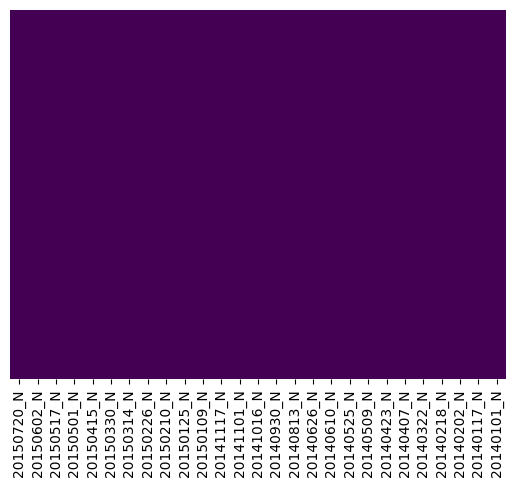

In [7]:
sns.heatmap(X.isnull() , cbar =False , yticklabels=False , cmap='viridis')

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)
X.sample(10)

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
7890,0.437401,0.208079,1.228391,1.050229,0.689879,1.099701,1.507443,0.586870,1.285008,0.122126,...,-1.588402,1.107862,-0.866624,-1.084730,0.503826,-0.301026,0.060247,0.766963,1.041072,-0.508819
6625,-2.181415,0.208079,-1.542217,-2.097854,-0.644099,-1.342527,-1.125303,-1.926384,-1.449607,-1.822050,...,-1.015657,-0.944009,-0.848538,-0.735061,-0.207281,-0.444082,-0.457324,0.357879,-0.447252,-0.837037
2913,0.436164,-1.642995,-0.475192,1.193924,-0.927178,0.503057,-0.205202,0.283100,-1.208863,0.358945,...,-1.584882,0.410531,-0.165154,2.093643,0.673946,0.743975,-0.705600,0.105695,-0.846738,0.134401
1566,0.328306,1.159396,1.076487,0.740328,1.771235,1.164890,-0.287926,0.179376,-0.135449,0.799869,...,0.978606,-0.350504,0.379690,-1.276217,-0.549343,-0.744086,-0.457324,0.752858,0.112637,1.263040
2333,0.446605,0.319109,0.349026,-0.079429,1.001103,0.301596,1.128899,0.726477,1.132156,0.833994,...,1.033228,0.456396,-0.063061,-0.171389,1.631413,-0.444082,2.062372,0.297914,2.115798,-0.456248
6445,-2.244208,-1.854258,-1.511682,-2.174631,-0.830698,-1.981583,-1.050925,-1.868705,-1.222922,-1.873692,...,-1.764815,-1.208909,-1.050829,-0.940093,-0.538582,-0.760426,-0.632366,-3.606418,-0.793195,-0.869915
5600,0.684085,0.208079,0.287808,-0.219155,-0.472263,0.321914,-0.685521,-1.400408,-1.378074,-1.244566,...,0.943500,1.590228,-0.165154,-0.856447,-0.854373,-0.444082,-0.457324,-0.280824,-0.747465,-0.814039
3164,0.925851,1.193505,0.530086,1.199125,-0.956780,0.806635,0.823414,-1.916107,-0.841660,0.976901,...,-0.762626,1.640526,-0.483951,0.863136,-0.213955,0.387823,-0.454213,0.744867,-0.850607,-0.342451
6943,0.030685,0.288270,0.551555,0.218248,-0.258210,0.671720,1.014148,0.418868,-0.711646,0.417044,...,0.318614,0.908038,-0.165154,1.276414,1.198353,-0.375910,-0.676071,-0.074881,-0.752403,0.522656
6050,-0.608344,0.865024,-1.400392,-1.703810,-0.698425,1.035823,-0.205202,0.271326,0.055047,0.964889,...,-0.208766,-0.721459,2.494129,-1.236293,1.824497,-0.971961,-0.255149,0.756771,-0.893487,-0.456248


In [9]:
X["mean"]=X.mean(axis=1)
X["median"]=X.median(axis=1)
X["var"]=X.var(axis=1)
X["min"]=X.min(axis=1)
X["max"]=X.max(axis=1)
X['range']=X.max(axis=1)-X.min(axis=1)
X.sample(4)


,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140218_N,20140202_N,20140117_N,20140101_N,mean,median,var,min,max,range
2546,-2.231096,1.280057,0.616371,1.143596,1.838617,1.186213,-0.233954,0.415467,1.153043,0.711888,...,1.595673,0.637147,1.948264,0.722700,0.336972,0.626759,1.267792,-2.231096,1.948264,4.179360
3923,-1.592812,0.050484,1.167574,1.157276,-0.979727,0.274209,-0.205202,0.898315,0.055047,-1.906256,...,-0.457324,0.191456,-0.944935,-0.884895,-0.276028,-0.589603,1.141535,-1.906256,2.601966,4.508222
94,-2.280001,-1.894734,-1.763413,-2.267227,-0.825961,-1.744876,-0.979488,0.271326,0.055047,-1.614112,...,-0.675167,-2.456737,-0.608836,-0.456248,-0.876638,-0.708204,0.567949,-2.456737,0.567949,3.024687
7754,-1.793876,-1.170473,-1.285795,-1.654114,-0.573480,-1.428110,-1.125637,-1.365923,-1.306954,-1.516953,...,-0.754563,-2.597752,-0.506620,-0.337158,-0.887353,-0.820958,0.372228,-2.597752,0.372228,2.969980


In [10]:
Y = hacktrain['class_encoded']


In [11]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [12]:
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=1000)
model.fit(x_train , y_train)
y_pred=model.predict(x_test)


print("accuracy is"  , accuracy_score(y_test , y_pred))
print("\n confusion matrix :\n", confusion_matrix(y_test , y_pred))
print("\n classification report \n",classification_report(y_test , y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy is 0.90375

 confusion matrix :
 [[  94   51    1   11    2    2]
 [  18 1205    1    4    2    1]
 [   2    8   29    4    0    0]
 [  12   14    4  107    1    3]
 [   0    5    0    1    0    0]
 [   2    3    0    2    0   11]]

 classification report 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65       161
           1       0.94      0.98      0.96      1231
           2       0.83      0.67      0.74        43
           3       0.83      0.76      0.79       141
           4       0.00      0.00      0.00         6
           5       0.65      0.61      0.63        18

    accuracy                           0.90      1600
   macro avg       0.66      0.60      0.63      1600
weighted avg       0.90      0.90      0.90      1600



In [13]:
hacktest.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [14]:
hacktest_X = hacktest[ndvi_cols]

hacktest_X = hacktest_X.apply(remove_outliers, axis=1)
hacktest_X = pd.DataFrame(imputer.transform(hacktest_X), columns=hacktest_X.columns)



hacktest_X = pd.DataFrame(
    scaler.fit_transform(hacktest_X),
    columns=hacktest_X.columns,
    index=hacktest_X.index
)

hacktest_X["mean"]=hacktest_X.mean(axis=1)
hacktest_X["median"]=hacktest_X.median(axis=1)
hacktest_X["var"]=hacktest_X.var(axis=1)
hacktest_X["min"]=hacktest_X.min(axis=1)
hacktest_X["max"]=hacktest_X.max(axis=1)
hacktest_X['range']=hacktest_X.max(axis=1)-X.min(axis=1)
hacktest_X.sample(10)

,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,...,20140218_N,20140202_N,20140117_N,20140101_N,mean,median,var,min,max,range
677,0.090419,0.372654,1.136204,1.154755,-0.855851,-0.870034,0.022232,-1.639517,-0.126291,-1.448621,...,-0.753676,-0.787605,-0.880054,-0.690418,-0.073995,-0.025882,0.571230,-1.639517,1.154755,2.567718
1110,0.709752,-1.317589,-0.093214,-0.811999,-0.750156,0.148086,1.123000,0.764481,-0.769956,-1.249793,...,-0.469940,0.571204,-0.912088,-0.308949,-0.277344,-0.449787,0.459215,-1.317589,1.181158,2.332831
1201,-0.125110,0.950285,-0.554424,1.133723,1.831899,0.829898,-0.931390,-1.449043,-0.676647,-0.178028,...,0.602228,-1.987851,-0.722363,-0.605283,0.052892,-0.151569,1.181871,-1.987851,2.836341,4.538506
1778,0.296486,1.397360,-1.033089,-1.583719,2.075161,1.165114,1.218548,1.088859,1.303158,-0.362130,...,-0.682594,0.803440,1.625156,-0.517527,0.532008,0.760408,1.026047,-1.583719,2.273944,3.571120
648,0.103910,-0.969549,-0.407074,-0.730827,0.228512,-0.589483,-0.063163,-0.074513,0.259159,0.223820,...,-0.670983,-0.810118,0.638008,0.894525,-0.047078,-0.055120,0.339291,-1.280008,1.183626,2.340932
1876,-1.369425,1.198337,0.385255,-1.341866,1.304204,1.126420,-0.613504,0.909591,1.406468,0.686676,...,2.715694,0.948164,-0.581506,-0.727425,0.356670,0.506173,1.123219,-1.369425,2.715694,3.885282
575,-0.250802,-0.994495,-0.790424,-1.536710,-0.929798,-0.881324,-1.037796,-1.127039,0.107326,-0.353083,...,-0.167487,-1.040710,0.672317,1.145630,-0.215422,-0.301943,0.563978,-1.536710,1.249008,2.743148
1079,0.139389,0.446542,0.855033,0.021361,-0.806053,-0.039645,-0.643494,-0.095837,-0.212655,-1.350865,...,-0.707253,-1.196129,-0.759418,1.688649,0.211486,0.143866,0.696602,-1.350865,1.688649,3.130306
2702,-1.132242,0.093822,0.277903,0.023235,-0.340319,0.757918,0.625309,0.779685,0.686017,-0.741576,...,-0.574708,0.767054,-0.842623,-0.720536,-0.046647,-0.073996,0.467057,-1.132242,1.387965,3.343119
2298,1.077393,-0.744276,1.475238,1.354084,-0.790258,1.278051,1.743188,1.272639,1.559281,1.186744,...,-0.739986,0.996232,2.463455,-0.355152,0.693217,1.036812,1.143083,-0.992517,2.511294,4.050370


In [15]:
hacktest_y_pred = model.predict(hacktest_X)

decoded_pred = le.inverse_transform(hacktest_y_pred)

final_df = pd.DataFrame({'ID':hacktest['ID'].values , 'class':decoded_pred})

print(final_df.sample(8))

        ID       class
1307  1308      forest
377    378  impervious
2514  2515      forest
2794  2795      forest
705    706      forest
332    333       grass
2248  2249      forest
1971  1972      forest


In [16]:
final_df.to_csv("submission_6.csv",index=False)